## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
raw_data = pd.read_csv("Iris.csv")
raw_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data analysis and preprocessing

In [3]:
raw_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
df = raw_data.copy()

In [5]:
import re 
df["Species"] = df["Species"].apply(lambda x: re.sub("^Iris-","", x))
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [6]:
df.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [7]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm']]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = df["Species"]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

## Data Visualization

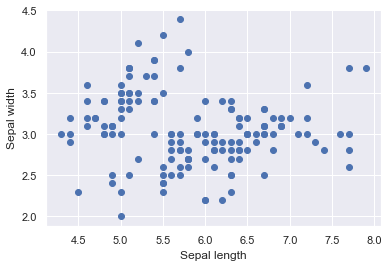

In [9]:
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

In [10]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Modeling

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [12]:
clusters = df.copy()
clusters["clusters"] = kmeans.fit_predict(X)
clusters

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,0
147,148,6.5,3.0,5.2,2.0,virginica,2
148,149,6.2,3.4,5.4,2.3,virginica,2


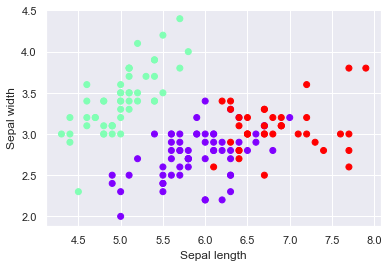

In [13]:
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"], c=clusters["clusters"], cmap="rainbow")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

### Scaling the data

In [14]:
from sklearn.preprocessing import scale
X_scaled = pd.DataFrame(scale(X))
X_scaled

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [15]:
X_scaled.columns = X.columns
X_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [16]:
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(X_scaled)
clusters_scaled = df.copy()
clusters_scaled["clusters"] = kmeans_scaled.fit_predict(X)
clusters_scaled

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,0
147,148,6.5,3.0,5.2,2.0,virginica,2
148,149,6.2,3.4,5.4,2.3,virginica,2


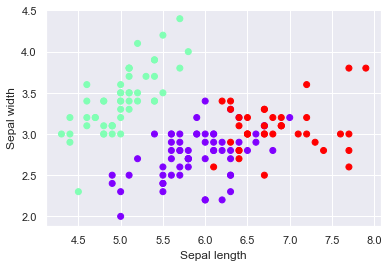

In [17]:
plt.scatter(clusters_scaled["SepalLengthCm"], clusters_scaled["SepalWidthCm"], c=clusters_scaled["clusters"], cmap="rainbow")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

In [18]:
x=clusters_scaled.iloc[:, [1,2,3,4]].values
x[0][0]

5.1

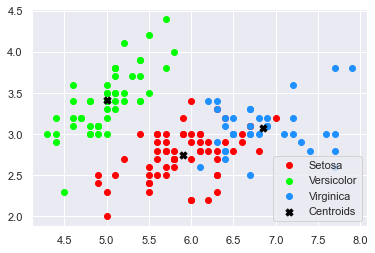

In [19]:
plt.scatter(x[clusters_scaled.index[clusters_scaled["clusters"]==0],0], 
            x[clusters_scaled.index[clusters_scaled["clusters"]==0],1], 
            c="red", label="Setosa")
plt.scatter(x[clusters_scaled.index[clusters_scaled["clusters"]==1],0], 
            x[clusters_scaled.index[clusters_scaled["clusters"]==1],1], 
            c="lime", label="Versicolor")
plt.scatter(x[clusters_scaled.index[clusters_scaled["clusters"]==2],0], 
            x[clusters_scaled.index[clusters_scaled["clusters"]==2],1], 
            c="dodgerblue", label="Virginica")
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:,1], 
            s = 50, c = 'black', label = 'Centroids', marker="X")
plt.legend()
plt.show()

## Elbow Method

In [20]:
wcss = []
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(X_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.39210582733436,
 91.06677122728537,
 81.98856307319508,
 72.78729395303863,
 62.460052582686416,
 55.29303899302204]

Text(0, 0.5, 'Within-cluster Sum of Squares')

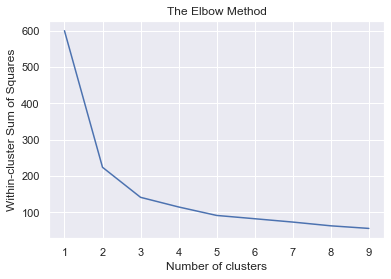

In [21]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Elbow method shows us that 3 is the optimal number of clusters.

In [22]:
df["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
df["Species"] = df["Species"].map({"setosa":0, "versicolor":1, "virginica":2})
df.drop(["Id"], axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Comparing the result to the real data

Text(0.5, 1.0, 'Model prediction')

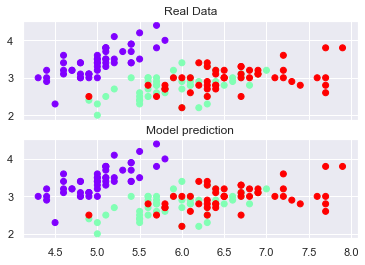

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, sharex=True)
ax1.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'], cmap="rainbow")
ax2.scatter(clusters_scaled['SepalLengthCm'], clusters_scaled['SepalWidthCm'], c=df['Species'], cmap="rainbow")
ax1.set_title("Real Data")
ax2.set_title("Model prediction")

Text(0.5, 1.0, 'Model prediction')

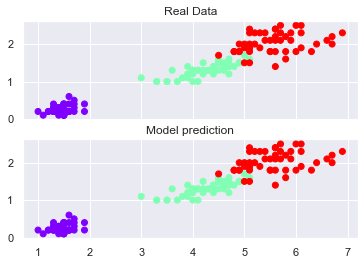

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, sharex=True)
ax1.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Species'], cmap="rainbow")
ax2.scatter(clusters_scaled['PetalLengthCm'], clusters_scaled['PetalWidthCm'], c=df['Species'], cmap="rainbow")
ax1.set_title("Real Data")
ax2.set_title("Model prediction")